In [191]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default='notebook'

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [192]:
df=pd.read_csv('metacritic_2021.csv')
df.head()

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9


In [193]:
df.columns

Index(['name', 'platform', 'release_date', 'summary', 'meta_score',
       'user_review'],
      dtype='object')

In [194]:
df.shape

(18800, 6)

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          18800 non-null  object
 1   platform      18800 non-null  object
 2   release_date  18800 non-null  object
 3   summary       18686 non-null  object
 4   meta_score    18800 non-null  int64 
 5   user_review   18800 non-null  object
dtypes: int64(1), object(5)
memory usage: 881.4+ KB


In [197]:
df.drop(columns = ['summary'] , inplace=True)

In [198]:
df.isnull().sum()

name            0
platform        0
release_date    0
meta_score      0
user_review     0
dtype: int64

In [199]:
df['name'].duplicated().sum()
norepeat = df.drop_duplicates(subset=['name'])
norepeat.shape
norepeat.head()

,name,platform,release_date,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",98,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",98,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999",98,8.4
5,Super Mario Galaxy,Wii,"November 12, 2007",97,9.1


In [200]:
norepeat['name']

0              The Legend of Zelda: Ocarina of Time
1                          Tony Hawk's Pro Skater 2
2                               Grand Theft Auto IV
3                                       SoulCalibur
5                                Super Mario Galaxy
                            ...                    
18793                              Charlie's Angels
18795                      Fast & Furious: Showdown
18796                       Drake of the 99 Dragons
18797    Afro Samurai 2: Revenge of Kuma Volume One
18798     Infestation: Survivor Stories (The War Z)
Name: name, Length: 12254, dtype: object

In [201]:
norepeat['platform'].unique().shape

(22,)

In [202]:
df['platform'].value_counts()

platform
 PC                  4864
 PlayStation 4       2056
 Xbox 360            1644
 PlayStation 2       1414
 Switch              1399
 PlayStation 3       1256
 Xbox One            1179
 Xbox                 789
 DS                   720
 Wii                  655
 PSP                  512
 GameCube             448
 Game Boy Advance     438
 3DS                  396
 PlayStation Vita     257
 PlayStation          187
 Wii U                184
 Dreamcast            125
 PlayStation 5        124
 Xbox Series X         77
 Nintendo 64           71
 Stadia                 5
Name: count, dtype: int64

In [203]:
df["user_review"] = pd.to_numeric(df["user_review"], errors='coerce')  #coerce will ignore the error and convert the value to NaN
df['platform'] = df.platform.astype('category')
df['name'] = df.name.astype(str)
df['year'] = pd.DatetimeIndex(df['release_date']).year
df['meta_score'] = df['meta_score'].div(10).round(1)
df.head()

,name,platform,release_date,meta_score,user_review,year
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998",9.9,9.1,1998
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",9.8,7.4,2000
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",9.8,7.7,2008
3,SoulCalibur,Dreamcast,"September 8, 1999",9.8,8.4,1999
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",9.8,7.9,2008


In [240]:
def game_of_the_year(df):
    max_scores_idx = df.groupby('year')['meta_score'].idxmax()
    game_of_the_year_df = df.loc[max_scores_idx, ['name', 'year']]

game_of_the_year_data = game_of_the_year(df)


new_df = game_of_the_year_data.copy()
GOTyear=new_df['year'].tolist()

def get_game_name_by_year(year, df):
    game_name = df.loc[df['year'] == year, 'name'].iloc[0]
    return game_name

year_input = 2014
game_name = get_game_name_by_year(year_input, df)
print(game_name)

Grand Theft Auto V


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   name          18800 non-null  object  
 1   platform      18800 non-null  category
 2   release_date  18800 non-null  object  
 3   meta_score    18800 non-null  float64 
 4   user_review   17435 non-null  float64 
 5   year          18800 non-null  int32   
dtypes: category(1), float64(2), int32(1), object(2)
memory usage: 680.1+ KB


In [205]:
df['user_review'].unique()

array([9.1, 7.4, 7.7, 8.4, 7.9, 8. , 8.3, 6.2, 8.7, 7.5, 8.8, 8.5, 8.6,
       8.9, 8.2, 9.2, 7.8, 9. , 9.3, 8.1, 6.8, 7.6, 6.9, 6.6, 7.3, 7.2,
       9.4, 5.7, 6. , 5.8, 7.1, 3.3, 5. , 5.5, 6.5, 5.9, 6.7, 3.8, 6.4,
       7. , 6.3, 4.9, nan, 5.3, 3.5, 4.7, 6.1, 4.8, 4.1, 5.6, 4.4, 5.4,
       4.6, 3.1, 5.2, 4.3, 1.8, 4.5, 5.1, 4.2, 4. , 9.7, 3.2, 2.9, 2.1,
       2.4, 3.4, 3. , 3.7, 2.2, 2.6, 2.7, 2.5, 2.8, 3.9, 2. , 9.6, 1.5,
       3.6, 1.4, 1.2, 0.9, 1.9, 1.1, 1.7, 0.8, 1. , 0.6, 2.3, 0.5, 1.6,
       0.2, 0.7, 1.3])

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   name          18800 non-null  object  
 1   platform      18800 non-null  category
 2   release_date  18800 non-null  object  
 3   meta_score    18800 non-null  float64 
 4   user_review   17435 non-null  float64 
 5   year          18800 non-null  int32   
dtypes: category(1), float64(2), int32(1), object(2)
memory usage: 680.1+ KB


In [207]:
df1 = df.dropna(subset=['user_review'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17435 entries, 0 to 18799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   name          17435 non-null  object  
 1   platform      17435 non-null  category
 2   release_date  17435 non-null  object  
 3   meta_score    17435 non-null  float64 
 4   user_review   17435 non-null  float64 
 5   year          17435 non-null  int32   
dtypes: category(1), float64(2), int32(1), object(2)
memory usage: 766.9+ KB


In [208]:
df2 = df.drop(columns=['release_date', 'name'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   platform     18800 non-null  category
 1   meta_score   18800 non-null  float64 
 2   user_review  17435 non-null  float64 
 3   year         18800 non-null  int32   
dtypes: category(1), float64(2), int32(1)
memory usage: 386.4 KB


In [209]:
df2 = df2.dropna(subset=['user_review'])

In [210]:
count_platform = df1["platform"].value_counts().reset_index()
count_platform.columns = ["Platform", "Count",]
count_platform

,Platform,Count
0,PC,4660
1,PlayStation 4,1950
2,Xbox 360,1547
3,PlayStation 2,1311
4,Switch,1216
5,PlayStation 3,1208
6,Xbox One,1089
7,Xbox,686
8,DS,599
9,Wii,597


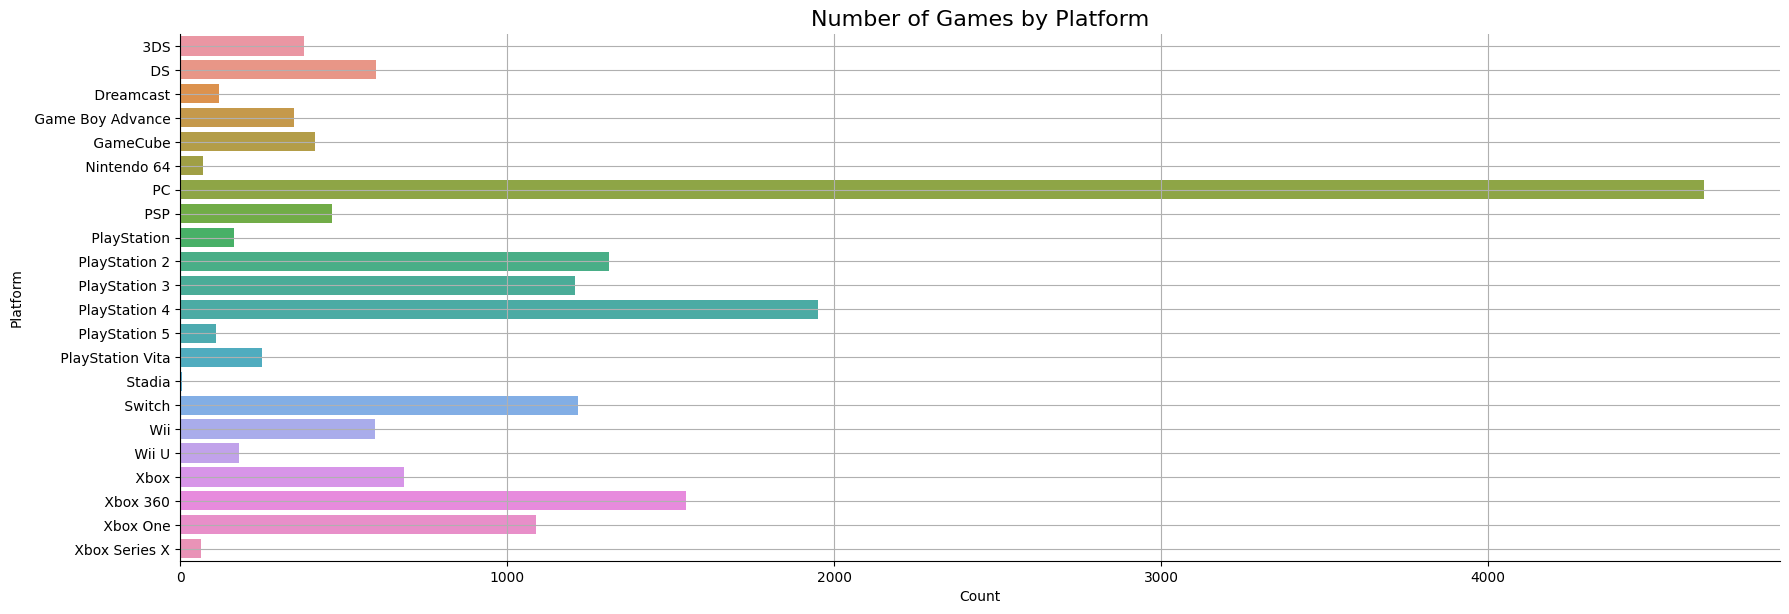

In [211]:
sns.catplot(x="Count", y="Platform", kind="bar", data=count_platform, height=6, aspect=3)
plt.title('Number of Games by Platform',fontsize=16)
plt.grid(True)

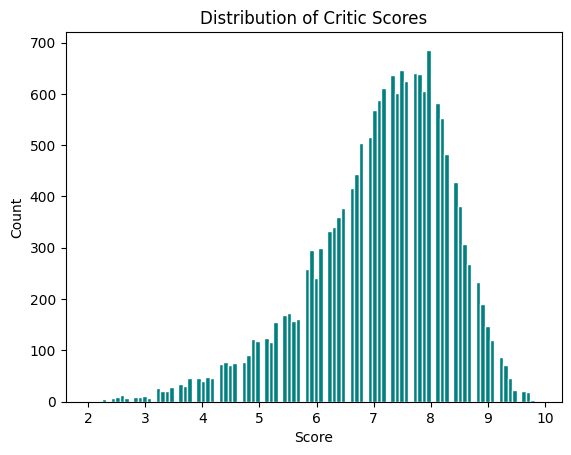

In [ ]:
plt.hist(df1['meta_score'], bins=100, color='teal', edgecolor='white', label='Metascore')
plt.title('Distribution of Critic Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

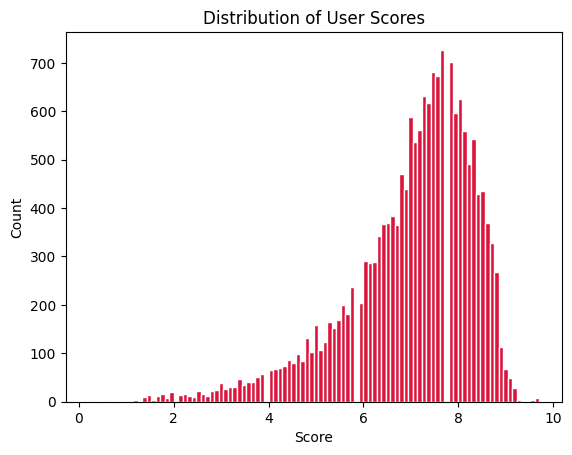

In [ ]:
plt.hist(df1['user_review'], bins=100, color='crimson', edgecolor='white', label='Metascore')
plt.title('Distribution of User Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

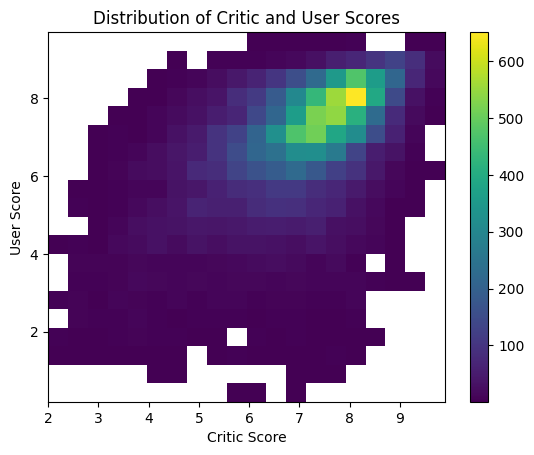

In [ ]:
plt.hist2d(df1['meta_score'], df1['user_review'], bins=20, cmin=1, label='Metascore')
plt.title('Distribution of Critic and User Scores')
plt.xlabel('Critic Score')
plt.ylabel('User Score')
plt.colorbar()
plt.show()

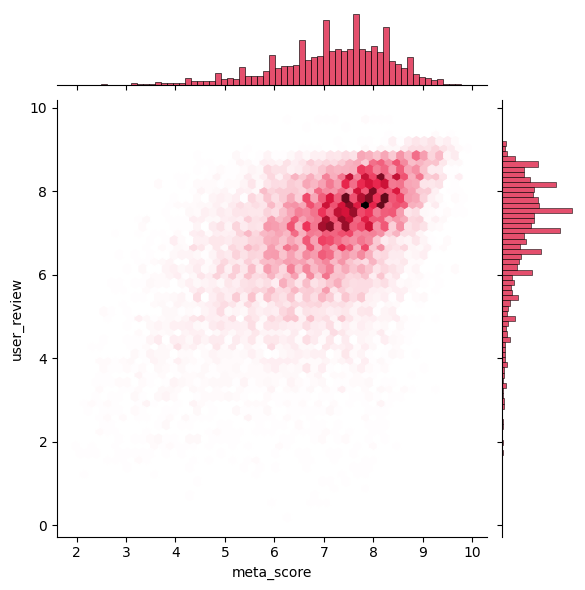

In [ ]:
sns.jointplot(x='meta_score', y='user_review', data=df1, kind='hex', color='crimson')
plt.show()

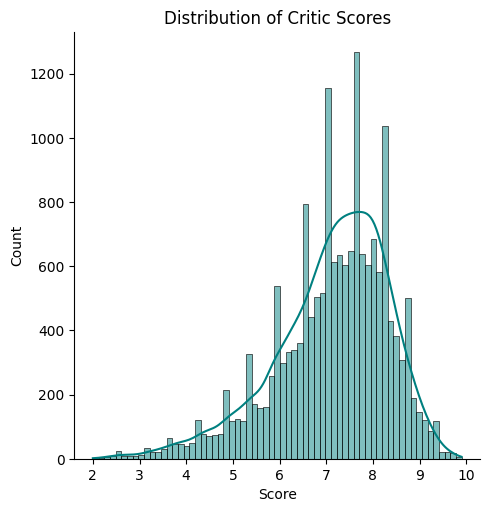

In [ ]:
sns.displot(df1['meta_score'], kde=True, color='teal')
plt.title('Distribution of Critic Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

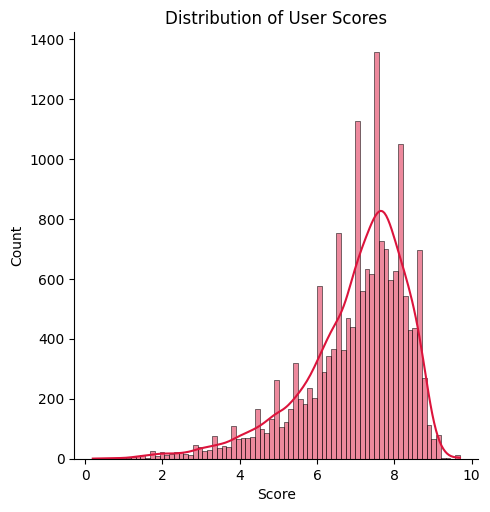

In [ ]:
sns.displot(df1['user_review'], kde=True, color='crimson')
plt.title('Distribution of User Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

In [ ]:
X1 = df2.drop(columns=['meta_score'])
y1 = df2['meta_score']

In [ ]:
X1.head()

,platform,user_review,year
0,Nintendo 64,9.1,1998
1,PlayStation,7.4,2000
2,PlayStation 3,7.7,2008
3,Dreamcast,8.4,1999
4,Xbox 360,7.9,2008


## Linear Regresssion

In [ ]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=4)

In [ ]:
X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape

((13948, 3), (3487, 3), (13948,), (3487,))

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Assuming X1_train, y1_train, X1_test, y1_test are Pandas DataFrames or Series

# Create the ColumnTransformer
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 2])
], remainder='passthrough')

# Create the LinearRegression model
step2 = LinearRegression()

# Create the pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline to the training data
pipe.fit(X1_train, y1_train)

# Make predictions on the test data
y1_pred = pipe.predict(X1_test)

# Calculate evaluation metrics
r2 = r2_score(y1_test, y1_pred)
mae = mean_absolute_error(y1_test, y1_pred)
mse = mean_squared_error(y1_test, y1_pred)

# Print the evaluation metrics
print('R2 score:', r2)
print('MAE:', mae)
print('MSE:', mse)


R2 score: 0.30514676545697106
MAE: 0.7728171796098413
MSE: 1.016415802334036


c:\Users\Shivansh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [ ]:
np.exp(0.77)

2.159766253784915

In [ ]:
grouped = df1.groupby('platform')
critic_grouped = grouped['meta_score']
critic_mean = critic_grouped.mean().round(decimals = 2).sort_values(ascending = False)
(critic_mean)

platform
 Nintendo 64         7.84
 Xbox Series X       7.68
 PlayStation 5       7.65
 Dreamcast           7.49
 PlayStation         7.45
 Switch              7.31
 Xbox One            7.29
 Wii U               7.28
 PC                  7.22
 GameCube            7.14
 PlayStation Vita    7.14
 PlayStation 4       7.13
 PlayStation 3       7.13
 Xbox                7.08
 3DS                 7.02
 Game Boy Advance    6.99
 Stadia              6.98
 Xbox 360            6.96
 PlayStation 2       6.95
 PSP                 6.93
 DS                  6.74
 Wii                 6.65
Name: meta_score, dtype: float64

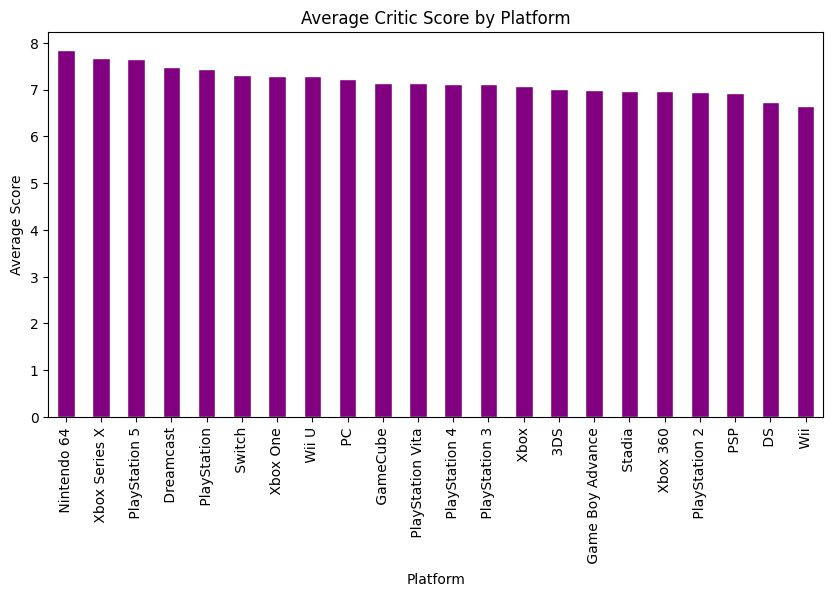

In [ ]:
critic_mean.plot(kind='bar', figsize=(10,5), color='purple', edgecolor='white', label='Metascore', title='Average Critic Score by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Score')
plt.show()

In [ ]:
user_grouped=grouped['user_review']
user_mean=user_grouped.mean().round(decimals=2).sort_values(ascending=False)
print(user_mean)

platform
 Nintendo 64         7.95
 Dreamcast           7.87
 PlayStation         7.72
 PlayStation 2       7.53
 Game Boy Advance    7.47
 GameCube            7.43
 Stadia              7.38
 Wii U               7.31
 PlayStation Vita    7.27
 PSP                 7.27
 Switch              7.17
 Xbox                7.16
 DS                  7.13
 3DS                 7.10
 Wii                 7.09
 PlayStation 3       6.92
 Xbox 360            6.92
 PC                  6.92
 PlayStation 5       6.67
 Xbox Series X       6.66
 PlayStation 4       6.49
 Xbox One            6.47
Name: user_review, dtype: float64


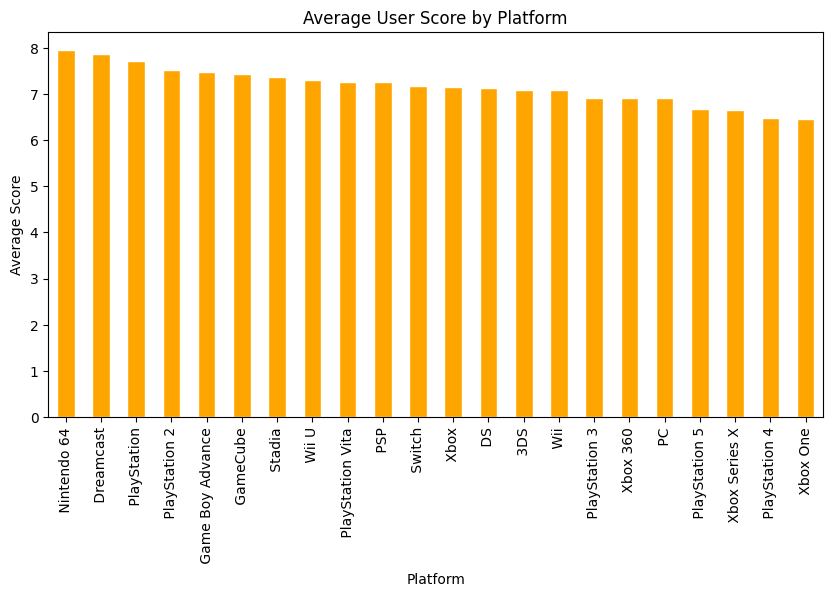

In [ ]:
user_mean.plot(kind='bar', figsize=(10,5), color='orange', edgecolor='white', label='User Score', title='Average User Score by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Score')
plt.show()

In [ ]:
grouped_year = df1.groupby('year')
critic_groupedYear = grouped_year['meta_score']
critic_meanYear = critic_groupedYear.mean().round(decimals = 2)
print(critic_meanYear)

year
1995    8.60
1996    8.54
1997    8.51
1998    8.32
1999    8.36
2000    7.38
2001    7.24
2002    7.13
2003    7.14
2004    7.05
2005    7.04
2006    6.80
2007    6.75
2008    6.81
2009    6.97
2010    7.06
2011    6.97
2012    7.06
2013    7.07
2014    7.13
2015    7.19
2016    7.17
2017    7.28
2018    7.24
2019    7.32
2020    7.31
2021    7.49
Name: meta_score, dtype: float64


In [ ]:
user_groupedYear = grouped_year['user_review']
user_meanYear = user_groupedYear.mean().round(decimals = 2)
print(user_meanYear)

year
1995    8.60
1996    8.35
1997    8.46
1998    8.41
1999    8.47
2000    7.59
2001    7.54
2002    7.41
2003    7.55
2004    7.49
2005    7.36
2006    7.26
2007    7.04
2008    7.07
2009    7.04
2010    7.12
2011    6.78
2012    6.82
2013    6.80
2014    6.85
2015    6.82
2016    6.71
2017    6.75
2018    6.71
2019    6.53
2020    6.62
2021    6.77
Name: user_review, dtype: float64


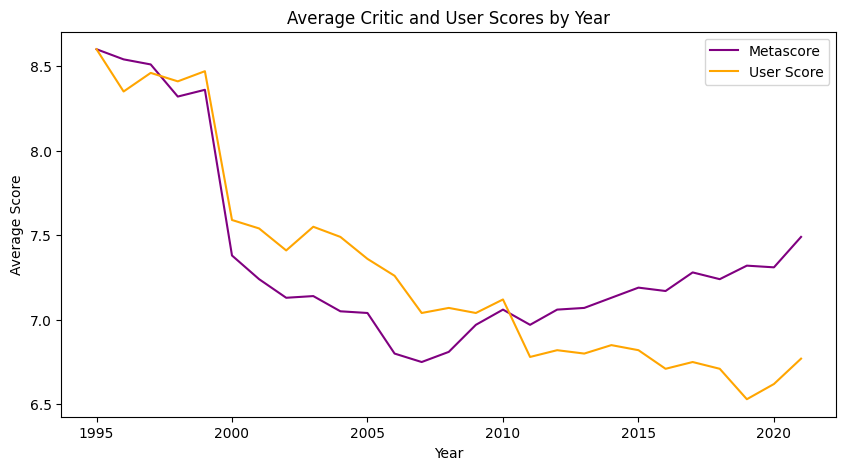

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(critic_meanYear, color='purple', label='Metascore')
plt.plot(user_meanYear, color='orange', label='User Score')
plt.title('Average Critic and User Scores by Year')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.legend()
plt.show()

In [ ]:
top_user_score = df1.sort_values(by='user_review', ascending=False).drop_duplicates('name').head(25)
top_user_score


,name,platform,release_date,meta_score,user_review,year
3504,Z.H.P. Unlosing Ranger vs Darkdeath Evilman,PSP,"October 25, 2010",8.1,9.7,2010
2450,Ghost Trick: Phantom Detective,DS,"January 11, 2011",8.3,9.7,2011
4953,Rochard,PlayStation 3,"September 27, 2011",7.9,9.7,2011
14836,Metal Torrent,DS,"May 24, 2010",6.2,9.7,2010
9550,After Burner Climax,Xbox 360,"April 21, 2010",7.2,9.7,2010
4844,GrimGrimoire,PlayStation 2,"June 26, 2007",7.9,9.7,2007
10936,Tengami,Wii U,"November 13, 2014",7.0,9.7,2014
12434,Crystar,PlayStation 4,"August 27, 2019",6.7,9.6,2019
4573,Superliminal,Xbox One,"July 7, 2020",8.0,9.6,2020
11304,Diaries of a Spaceport Janitor,PC,"September 16, 2016",6.9,9.6,2016


In [ ]:
top_meta_score = df1.sort_values(by='meta_score', ascending=False).drop_duplicates('name').head(25)
top_meta_score

,name,platform,release_date,meta_score,user_review,year
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998",9.9,9.1,1998
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",9.8,7.7,2008
3,SoulCalibur,Dreamcast,"September 8, 1999",9.8,8.4,1999
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",9.8,7.4,2000
14,Tony Hawk's Pro Skater 3,PlayStation 2,"October 28, 2001",9.7,7.5,2001
23,NFL 2K1,Dreamcast,"September 7, 2000",9.7,6.2,2000
22,The House in Fata Morgana - Dreams of the Reve...,Switch,"April 9, 2021",9.7,8.2,2021
21,Halo: Combat Evolved,Xbox,"November 14, 2001",9.7,8.7,2001
20,Super Mario Odyssey,Switch,"October 27, 2017",9.7,8.9,2017
19,Grand Theft Auto III,PlayStation 2,"October 22, 2001",9.7,8.4,2001


Text(0, 0.5, 'Name')

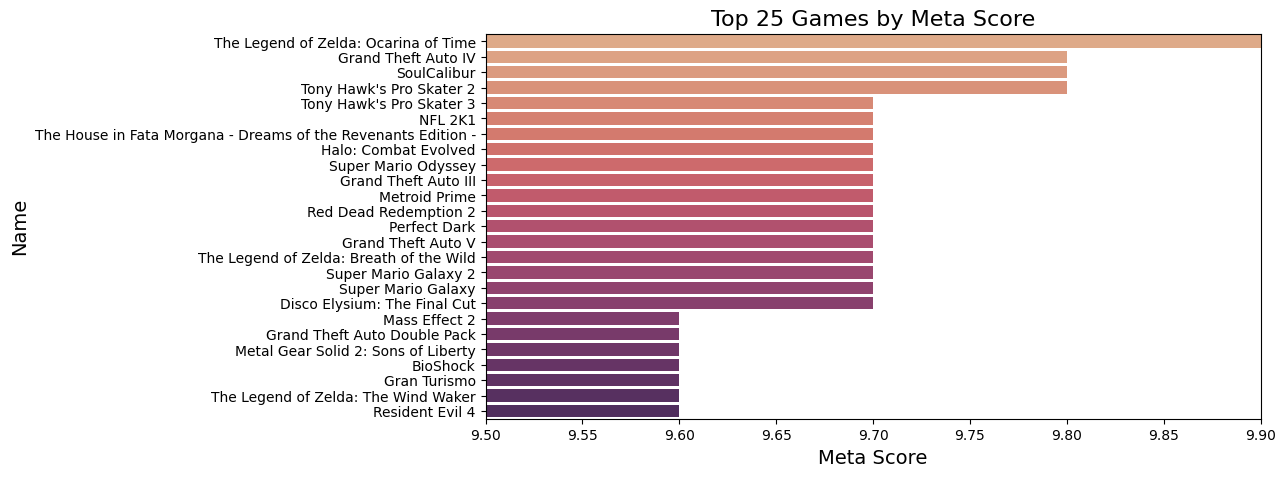

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=top_meta_score['meta_score'], y=top_meta_score['name'], orient = 'h', palette='flare')
plt.xlim(9.5,9.9)
plt.title('Top 25 Games by Meta Score', fontsize=16)
plt.xlabel('Meta Score', fontsize=14)
plt.ylabel('Name', fontsize=14)

Text(0, 0.5, 'Name')

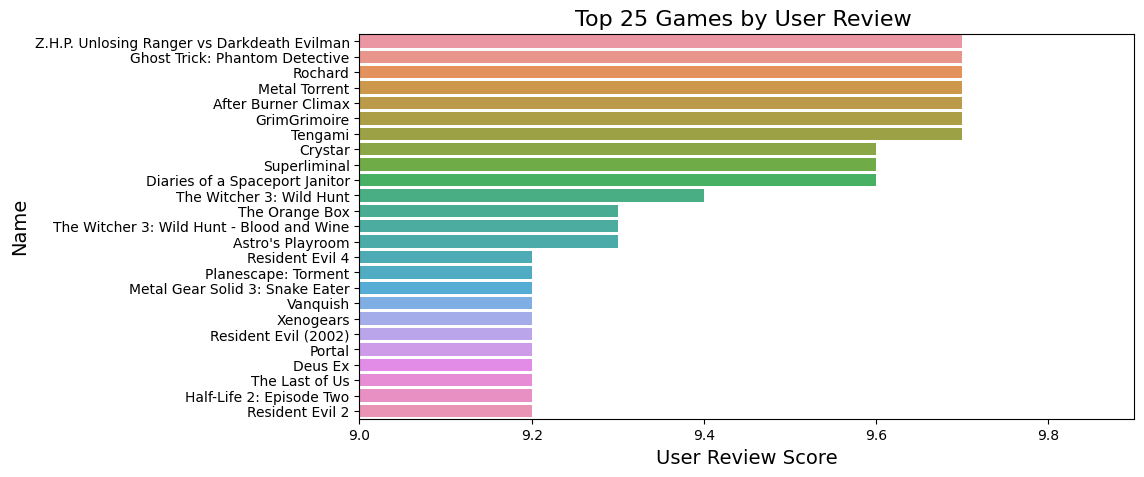

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))
sns.barplot(x = top_user_score['user_review'], y = top_user_score['name'])
plt.xlim(9.0,9.9)
plt.title('Top 25 Games by User Review ', fontsize = 16)
plt.xlabel('User Review Score', fontsize = 14)
plt.ylabel('Name', fontsize = 14)

In [ ]:
df1['platform'].unique()

[' Nintendo 64', ' PlayStation', ' PlayStation 3', ' Dreamcast', ' Xbox 360', ..., ' DS', ' PlayStation Vita', ' PlayStation 5', ' PSP', ' Stadia']
Length: 22
Categories (22, object): [' 3DS', ' DS', ' Dreamcast', ' Game Boy Advance', ..., ' Xbox', ' Xbox 360', ' Xbox One', ' Xbox Series X']

In [ ]:
PC_games = df1[df1['platform'].str.contains('PC', na=False)]
PC_games['name'].unique().shape

(4612,)

In [ ]:
PC_data = {'min' : [np.min(PC_games['meta_score']), np.min(PC_games['user_review'])],
            'max' : [np.max(PC_games['meta_score']), np.max(PC_games['user_review'])],
            'mean' : [np.mean(PC_games['meta_score']), np.mean(PC_games['user_review'])],
            'median' : [np.median(PC_games['meta_score']), np.median(PC_games['user_review'])],
            'std' : [np.std(PC_games['meta_score']), np.std(PC_games['user_review'])],}
PC_game_summary = pd.DataFrame(PC_data, index=['Meta Score', 'User Review'])
PC_game_summary

,min,max,mean,median,std
Meta Score,2.0,9.7,7.217124,7.4,1.144899
User Review,0.6,9.6,6.918197,7.2,1.315094


<Axes: title={'center': 'PC Game Scores'}, xlabel='Score Type', ylabel='Score'>

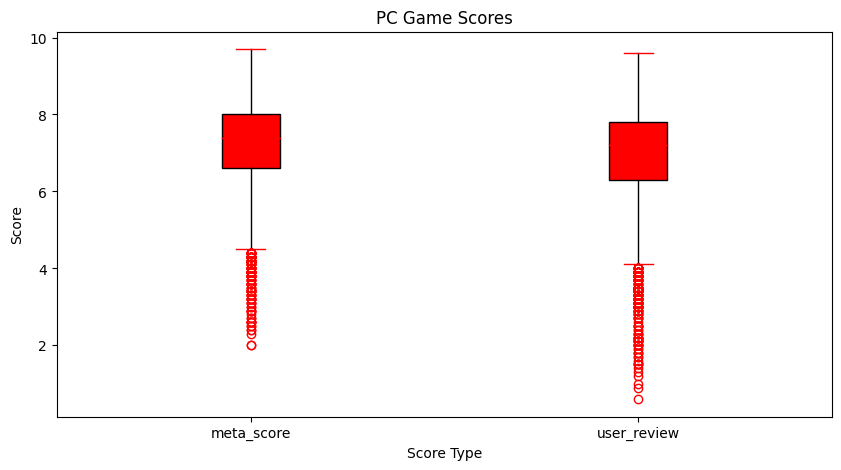

In [ ]:
PC_games[['meta_score','user_review']].plot(kind='box', figsize=(10,5), title='PC Game Scores', ylabel='Score', xlabel='Score Type', color='black', patch_artist=True, boxprops=dict(facecolor='red', color='black'), capprops=dict(color='red'), whiskerprops=dict(color='black'), flierprops=dict(color='red', markeredgecolor='red'), medianprops=dict(color='red'))

In [ ]:
PC_games_by_year = PC_games.groupby('year')
PC_critic_by_year = PC_games_by_year['meta_score']
PC_critic_mean_year = PC_critic_by_year.mean().round(decimals = 2)
PC_critic_mean_year


year
1995    8.60
1996    8.34
1997    8.52
1998    8.65
1999    8.53
2000    7.57
2001    7.27
2002    7.13
2003    7.23
2004    7.16
2005    7.09
2006    6.91
2007    6.98
2008    6.87
2009    6.93
2010    7.14
2011    7.05
2012    7.11
2013    7.04
2014    7.21
2015    7.23
2016    7.32
2017    7.38
2018    7.30
2019    7.43
2020    7.34
2021    7.53
Name: meta_score, dtype: float64

In [ ]:
PC_user_by_year = PC_games_by_year['user_review']
PC_user_mean_year = PC_user_by_year.mean().round(decimals = 2)
PC_user_mean_year

year
1995    8.60
1996    8.27
1997    8.58
1998    8.55
1999    8.56
2000    7.61
2001    7.51
2002    7.30
2003    7.45
2004    7.22
2005    6.96
2006    7.27
2007    7.10
2008    6.85
2009    6.81
2010    6.87
2011    6.61
2012    6.81
2013    6.79
2014    6.90
2015    6.80
2016    6.81
2017    6.79
2018    6.67
2019    6.58
2020    6.60
2021    6.69
Name: user_review, dtype: float64

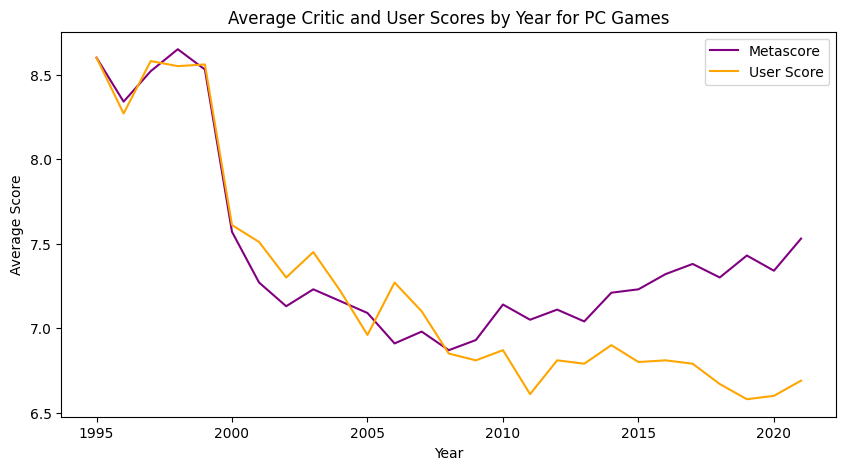

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(PC_critic_mean_year, color='purple', label='Metascore')
plt.plot(PC_user_mean_year, color='orange', label='User Score')
plt.title('Average Critic and User Scores by Year for PC Games')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.legend()
plt.show()

In [ ]:
PS_games = df1[df1['platform'].str.contains('PlayStation', na=False)]
PS_games = PS_games.drop(df1[df1['platform'] == ' PlayStation Vita'].index)
PS_games.user_review = PS_games.user_review*10
PS_games.meta_score = PS_games.meta_score*10
PS_games.head()

,name,platform,release_date,meta_score,user_review,year
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",98.0,74.0,2000
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",98.0,77.0,2008
9,Grand Theft Auto V,PlayStation 3,"September 17, 2013",97.0,83.0,2013
14,Tony Hawk's Pro Skater 3,PlayStation 2,"October 28, 2001",97.0,75.0,2001
16,Red Dead Redemption 2,PlayStation 4,"October 26, 2018",97.0,85.0,2018


In [ ]:
PS_games['name'].unique().shape

(4547,)

In [ ]:
PS_data = {'min' : [np.min(PS_games.meta_score) , np.min(PS_games.user_review)],
        'max' : [np.max(PS_games.meta_score) , np.max(PS_games.user_review)],
        'mean' : [np.mean(PS_games.meta_score) , np.mean(PS_games.user_review)],
        'median' : [np.median(PS_games.meta_score) , np.median(PS_games.user_review)],
        'std' : [np.std(PS_games.meta_score) , np.std(PS_games.user_review)]}
PS_number_summary = pd.DataFrame(PS_data , index=['Meta Score' , 'User Review'])
PS_number_summary

,min,max,mean,median,std
Meta Score,21.0,98.0,71.036249,73.0,12.241216
User Review,2.0,97.0,69.367966,72.0,14.178714


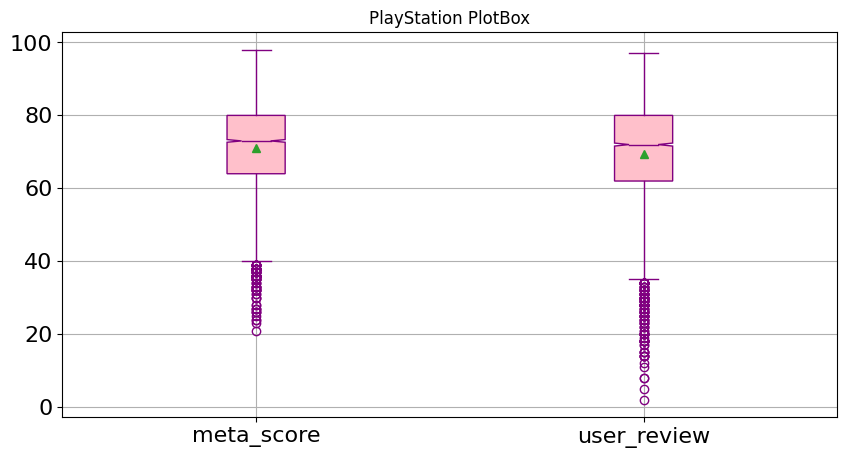

In [ ]:
PS_games[['meta_score' , 'user_review']].plot.box(title = 'PlayStation PlotBox', figsize=(10,5,), color='purple', vert=True, grid=True, fontsize=16, patch_artist=True, notch=True, boxprops=dict(facecolor='pink', color='purple'), medianprops=dict(color='purple'), whiskerprops=dict(color='purple'), capprops=dict(color='purple'), flierprops=dict(color='purple', markeredgecolor='purple'), meanprops=dict(color='purple'), showmeans=True)
plt.show()

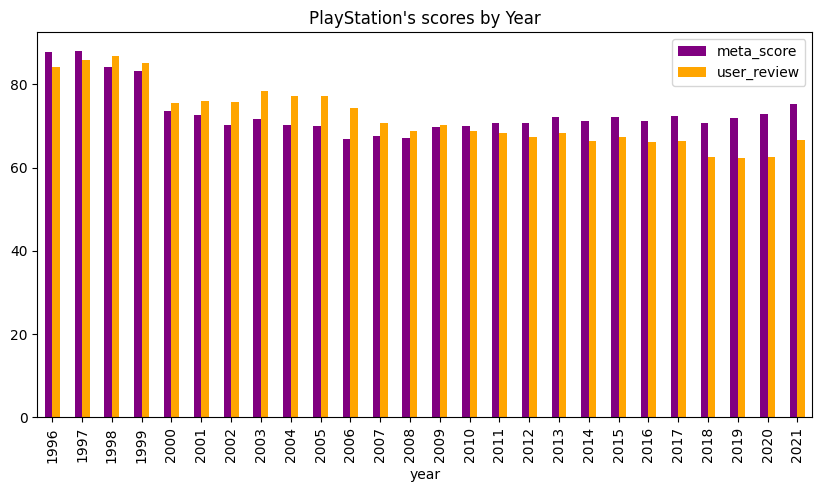

In [ ]:
PS_by_year = PS_games.groupby('year')[['meta_score','user_review']].mean().reset_index()
PS_by_Gen = PS_games.groupby('platform')[['meta_score','user_review']].mean().reset_index()
PS_by_Gen = PS_by_Gen.dropna()
PS_by_year.set_index('year').plot.bar(title = "PlayStation's scores by Year", figsize=(10,5), color=['purple','orange'])
plt.show()

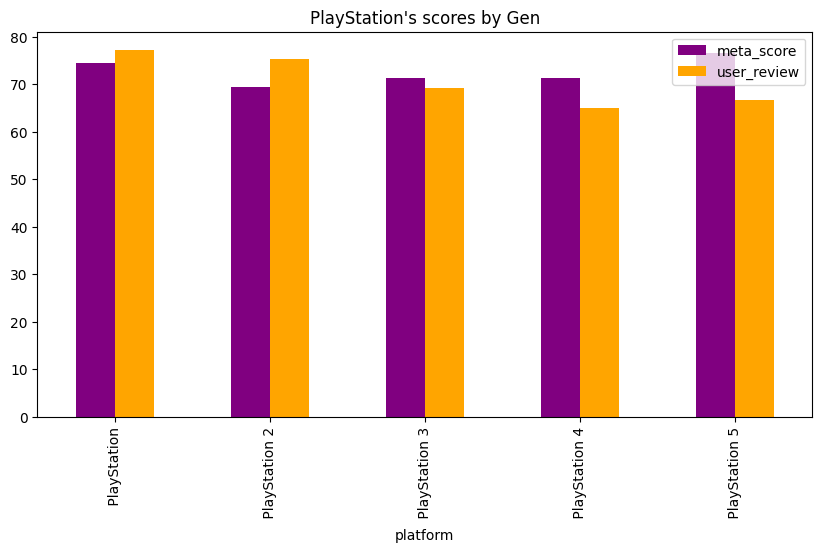

In [ ]:
PS_by_Gen.set_index('platform').plot.bar(title = "PlayStation's scores by Gen", figsize=(10,5), color=['purple','orange'])
plt.show()

In [ ]:
PS_games[['name', 'platform', 'user_review' , 'year']].sort_values('user_review', ascending = False)[:10]

,name,platform,user_review,year
4844,GrimGrimoire,PlayStation 2,97.0,2007
4953,Rochard,PlayStation 3,97.0,2011
12434,Crystar,PlayStation 4,96.0,2019
2407,Astro's Playroom,PlayStation 5,93.0,2020
222,The Witcher 3: Wild Hunt,PlayStation 4,92.0,2015
72,God of War,PlayStation 4,92.0,2018
98,Metal Gear Solid,PlayStation,92.0,1998
3341,Suikoden II,PlayStation,92.0,1999
60,The Last of Us Remastered,PlayStation 4,92.0,2014
780,It Takes Two,PlayStation 5,92.0,2021


In [ ]:
PS_games[['name', 'platform', 'meta_score' , 'year']].sort_values('meta_score', ascending = False)[:10]

,name,platform,meta_score,year
1,Tony Hawk's Pro Skater 2,PlayStation,98.0,2000
2,Grand Theft Auto IV,PlayStation 3,98.0,2008
9,Grand Theft Auto V,PlayStation 3,97.0,2013
14,Tony Hawk's Pro Skater 3,PlayStation 2,97.0,2001
16,Red Dead Redemption 2,PlayStation 4,97.0,2018
17,Grand Theft Auto V,PlayStation 4,97.0,2014
19,Grand Theft Auto III,PlayStation 2,97.0,2001
39,Resident Evil 4,PlayStation 2,96.0,2005
43,Metal Gear Solid 2: Sons of Liberty,PlayStation 2,96.0,2001
41,Gran Turismo,PlayStation,96.0,1998


In [ ]:
XB_games = df1[df1['platform'].str.contains(' Xbox', na=False)]
XB_games.user_review = XB_games.user_review*10
XB_games.meta_score = XB_games.meta_score*10
XB_games.head()

,name,platform,release_date,meta_score,user_review,year
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",98.0,79.0,2008
7,Red Dead Redemption 2,Xbox One,"October 26, 2018",97.0,80.0,2018
8,Grand Theft Auto V,Xbox One,"November 18, 2014",97.0,79.0,2014
11,Grand Theft Auto V,Xbox 360,"September 17, 2013",97.0,83.0,2013
21,Halo: Combat Evolved,Xbox,"November 14, 2001",97.0,87.0,2001


In [ ]:
XB_games['name'].unique().shape

(3249,)

In [ ]:
XB_data = {'min' : [np.min(XB_games.meta_score) , np.min(XB_games.user_review)],
        'max' : [np.max(XB_games.meta_score) , np.max(XB_games.user_review)],
        'mean' : [np.mean(XB_games.meta_score) , np.mean(XB_games.user_review)],
        'median' : [np.median(XB_games.meta_score) , np.median(XB_games.user_review)],
        'std' : [np.std(XB_games.meta_score) , np.std(XB_games.user_review)]}
XB_number_summary = pd.DataFrame(XB_data , index=['Meta Score' , 'User Review'])
XB_number_summary

,min,max,mean,median,std
Meta Score,22.0,98.0,71.020372,73.0,12.906143
User Review,5.0,97.0,68.173310,71.0,13.828287


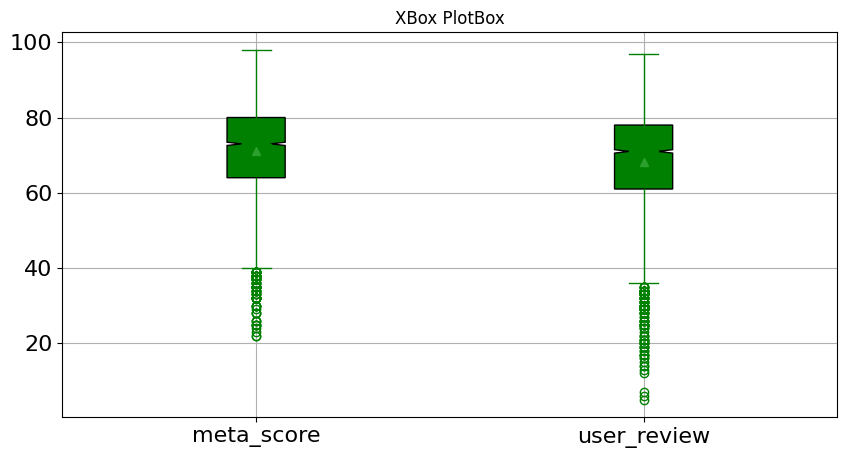

In [ ]:
XB_games[['meta_score' , 'user_review']].plot.box(title = "XBox PlotBox", figsize=(10,5,), color='purple', vert=True, grid=True, fontsize=16, patch_artist=True, notch=True, boxprops=dict(facecolor='green', color='black'), medianprops=dict(color='green'), whiskerprops=dict(color='green'), capprops=dict(color='green'), flierprops=dict(color='green', markeredgecolor='green'), meanprops=dict(color='red'), showmeans=True)
plt.show()

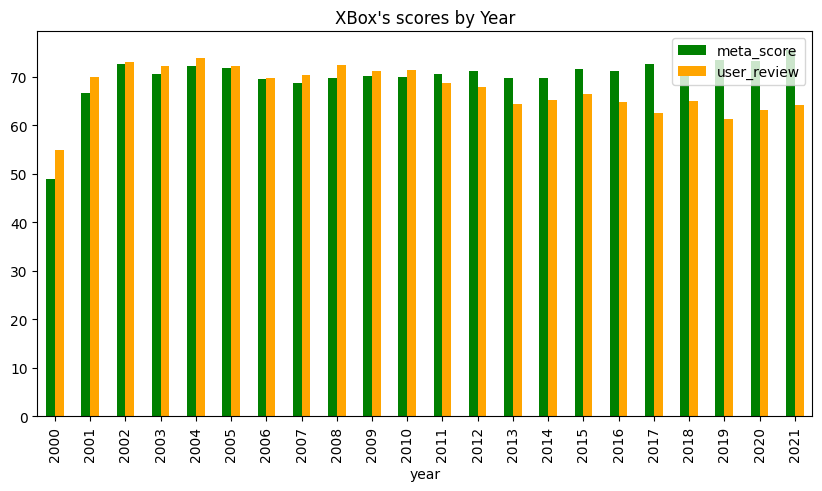

In [ ]:
XB_game_by_year = XB_games.groupby('year')[['meta_score','user_review']].mean().reset_index()
XB_game_by_Gen = XB_games.groupby('platform')[['meta_score','user_review']].mean().reset_index()
XB_game_by_Gen = XB_game_by_Gen.dropna()
XB_game_by_year.set_index('year').plot.bar(title = "XBox's scores by Year", figsize=(10,5), color=['green','orange'])
plt.show()

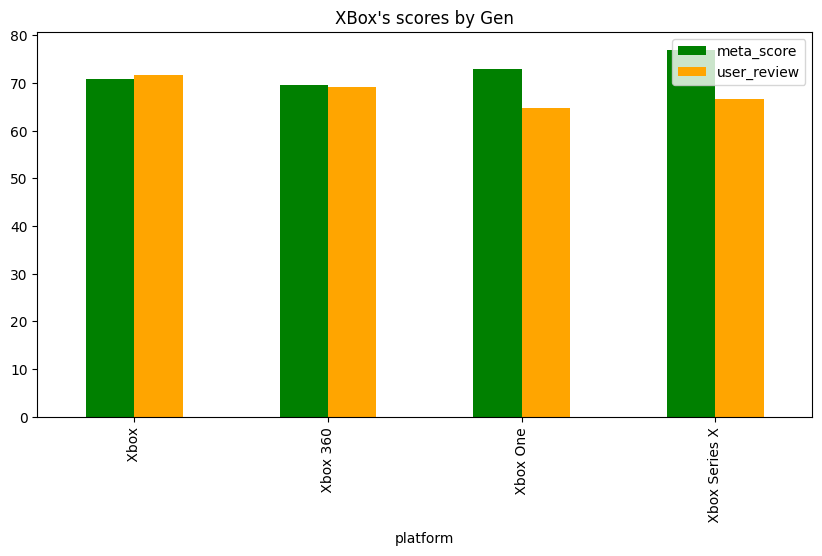

In [ ]:
XB_game_by_Gen.set_index('platform').plot.bar(title = "XBox's scores by Gen", figsize=(10,5), color=['green','orange'])
plt.show()

In [ ]:
XB_games[['name', 'platform', 'user_review' , 'year']].sort_values('user_review', ascending = False)[:10]

,name,platform,user_review,year
9550,After Burner Climax,Xbox 360,97.0,2010
4573,Superliminal,Xbox One,96.0,2020
2321,Vanquish,Xbox 360,92.0,2010
295,The Witcher 3: Wild Hunt,Xbox One,92.0,2015
109,Star Wars: Knights of the Old Republic,Xbox,91.0,2003
100,Tom Clancy's Splinter Cell Chaos Theory,Xbox,91.0,2005
31,The Orange Box,Xbox 360,90.0,2007
1111,NFL 2K2,Xbox,90.0,2002
817,DOOM Eternal,Xbox One,90.0,2020
27,BioShock,Xbox 360,90.0,2007


In [ ]:
XB_games[['name', 'platform', 'meta_score' , 'year']].sort_values('meta_score', ascending = False)[:10]

,name,platform,meta_score,year
4,Grand Theft Auto IV,Xbox 360,98.0,2008
8,Grand Theft Auto V,Xbox One,97.0,2014
11,Grand Theft Auto V,Xbox 360,97.0,2013
21,Halo: Combat Evolved,Xbox,97.0,2001
7,Red Dead Redemption 2,Xbox One,97.0,2018
35,Mass Effect 2,Xbox 360,96.0,2010
37,The Elder Scrolls V: Skyrim,Xbox 360,96.0,2011
44,Grand Theft Auto Double Pack,Xbox,96.0,2003
31,The Orange Box,Xbox 360,96.0,2007
27,BioShock,Xbox 360,96.0,2007


In [ ]:
PSvXB = df1[df1['platform'].isin([  'PlayStation 3' , ' PlayStation 4' , ' PlayStation 5' , 'Xbox 360' , ' Xbox One' , ' Xbox Series X'])]
PSvXB.user_review = PSvXB.user_review*10
PSvXB.meta_score = PSvXB.meta_score*10
PSvXB.head()

,name,platform,release_date,meta_score,user_review,year
7,Red Dead Redemption 2,Xbox One,"October 26, 2018",97.0,80.0,2018
8,Grand Theft Auto V,Xbox One,"November 18, 2014",97.0,79.0,2014
16,Red Dead Redemption 2,PlayStation 4,"October 26, 2018",97.0,85.0,2018
17,Grand Theft Auto V,PlayStation 4,"November 18, 2014",97.0,84.0,2014
59,Persona 5 Royal,PlayStation 4,"March 31, 2020",95.0,84.0,2020


In [ ]:
PSvXB_count = PSvXB.groupby('platform').count()
PSvXB_count.drop(PSvXB_count.index[0:11] , inplace=True)
PSvXB_count.drop(PSvXB_count.index[2:9] , inplace=True)
PSvXB_count.drop(['meta_score' , 'user_review' , 'year','release_date'] , axis=1 , inplace=True)
PSvXB_count.rename(columns={'name':'Count'} , inplace=True)
PSvXB_count

,Count
platform,
PlayStation 4,1950
PlayStation 5,110
Xbox One,1089
Xbox Series X,65


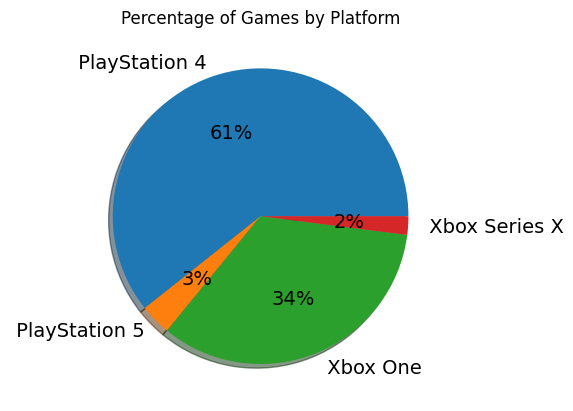

In [ ]:
plt.pie(PSvXB_count.Count, labels = PSvXB_count.index , autopct='%.0f%%', shadow=True, textprops={'fontsize': 14},)
plt.title('Percentage of Games by Platform')
plt.show()

In [ ]:
PSvXB[['name', 'platform', 'meta_score']].sort_values('meta_score', ascending = False)[:20]

,name,platform,meta_score
7,Red Dead Redemption 2,Xbox One,97.0
16,Red Dead Redemption 2,PlayStation 4,97.0
17,Grand Theft Auto V,PlayStation 4,97.0
8,Grand Theft Auto V,Xbox One,97.0
59,Persona 5 Royal,PlayStation 4,95.0
60,The Last of Us Remastered,PlayStation 4,95.0
65,Metal Gear Solid V: The Phantom Pain,Xbox One,95.0
72,God of War,PlayStation 4,94.0
81,Celeste,Xbox One,94.0
158,Metal Gear Solid V: The Phantom Pain,PlayStation 4,93.0


In [ ]:
PSvXB[['name', 'platform', 'user_review']].sort_values('user_review', ascending = False)[:20]

,name,platform,user_review
12434,Crystar,PlayStation 4,96.0
4573,Superliminal,Xbox One,96.0
2407,Astro's Playroom,PlayStation 5,93.0
780,It Takes Two,PlayStation 5,92.0
222,The Witcher 3: Wild Hunt,PlayStation 4,92.0
60,The Last of Us Remastered,PlayStation 4,92.0
72,God of War,PlayStation 4,92.0
295,The Witcher 3: Wild Hunt,Xbox One,92.0
1154,Tales of Arise,PlayStation 5,91.0
335,The Witcher 3: Wild Hunt - Blood and Wine,PlayStation 4,91.0


Individual year ---> Best Game of the Year
